### PARADOS EXCEL MOCAP DATA GENERATOR 

In [1]:
#Imports
from tkinter import Tk, filedialog
import pandas as pd
from pandas import ExcelWriter
import csv
import numpy as np
import matplotlib.pyplot as plt


FPS = 30 #Frame Rate of the video
R2D = 180/np.pi #Radians to Degrees


In [2]:
#Read CSV in to create more organized sheets for easy access to particular LANDMARKS!
CSV_Path = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.CSV")])

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(CSV_Path)
print(df)

df['Frame Number'] = pd.to_numeric(df['Frame Number'], errors='coerce')
# Group the data by 'Landmark Name'
grouped_data = df.groupby(df.columns[1])

# Iterate over each group and print sorted data before exporting
for landmark_name, landmark_group in grouped_data:
    # Sort the group by 'Frame Number' in ascending order
    sorted_group = landmark_group.sort_values(by='Frame Number', ascending=True)

    # Print the sorted group to verify numeric order
    print(f"Landmark Name: {landmark_name}\n")
    print(sorted_group)
    print("\n")

# Create an Excel writer object
writer = pd.ExcelWriter('Sorted_Landmark_Data.xlsx', engine='xlsxwriter')

# Iterate over each group and write to a separate sheet
for landmark_name, landmark_group in grouped_data:
    # Sort the group by 'Frame Number' in ascending order
    sorted_group = landmark_group.sort_values(by='Frame Number', ascending=True)

    # Write the sorted group to a new dataframe
    landmark_dataframe = pd.DataFrame(sorted_group)

    # Write the dataframe to a sheet named after the landmark
    landmark_dataframe.to_excel(writer, sheet_name=landmark_name, index=False)

# Save the Excel file (automatically done by the writer)
writer.close()

print("Dataframes written to 'Sorted_Landmark_Data.xlsx' with each landmark on a separate sheet.")


     Frame Number     Landmark Name          X Position          Y Position
0               0              NOSE   526.9961035251617   339.1791343688965
1               0    LEFT_EYE_INNER   551.5225768089294   317.4894332885742
2               0          LEFT_EYE   563.0528783798218   318.9811134338379
3               0    LEFT_EYE_OUTER   571.6997838020325   321.1132621765137
4               0   RIGHT_EYE_INNER    514.159609079361   315.4096984863281
...           ...               ...                 ...                 ...
2579           76       RIGHT_ANKLE   346.6728973388672  1602.7681732177734
2580           76         LEFT_HEEL   785.6122183799744   1644.741439819336
2581           76        RIGHT_HEEL  348.19419264793396  1627.6709747314453
2582           76   LEFT_FOOT_INDEX   768.7525391578674   1727.859878540039
2583           76  RIGHT_FOOT_INDEX   343.4014928340912   1729.109001159668

[2584 rows x 4 columns]
Landmark Name: LEFT_ANKLE

      Frame Number Landmark Name    

### JOINT POSITIONS

In [3]:
#READ IN ORGANIZED EXCEL A PRODUCE ANGULAR DATA:
Excel_Path = filedialog.askopenfilename(title="Select Excel file", filetypes=[("Excel files", "*.xlsx")])

################## LOWER BODY LANDMARKS ################

# Left Side X & Y:
L_Hip_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_HIP', usecols=[2]))
L_Knee_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_KNEE', usecols=[2]))
L_Ankle_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_ANKLE', usecols=[2]))
L_Heel_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_HEEL', usecols=[2]))
L_Toe_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_FOOT_INDEX', usecols=[2]))

L_Hip_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_HIP', usecols=[3]))
L_Knee_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_KNEE', usecols=[3]))
L_Ankle_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_ANKLE', usecols=[3]))
L_Heel_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_HEEL', usecols=[3]))
L_Toe_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_FOOT_INDEX', usecols=[3]))

# Right Side X & Y:
R_Hip_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_HIP', usecols=[2]))
R_Knee_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_KNEE', usecols=[2]))
R_Ankle_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_ANKLE', usecols=[2]))
R_Heel_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_HEEL', usecols=[2]))
R_Toe_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_FOOT_INDEX', usecols=[2]))

R_Hip_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_HIP', usecols=[3]))
R_Knee_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_KNEE', usecols=[3]))
R_Ankle_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_ANKLE', usecols=[3]))
R_Heel_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_HEEL', usecols=[3]))
R_Toe_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_FOOT_INDEX', usecols=[3]))

###################### Upper Body Landmarks ###########################################

# Left Side:
L_Shoulder_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_SHOULDER', usecols=[2]))
L_Elbow_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_ELBOW', usecols=[2]))
L_Wrist_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_WRIST', usecols=[2]))

L_Shoulder_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_SHOULDER', usecols=[3]))
L_Elbow_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_ELBOW', usecols=[3]))
L_Wrist_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='LEFT_WRIST', usecols=[3]))

# Right Side:
R_Shoulder_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_SHOULDER', usecols=[2]))
R_Elbow_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_ELBOW', usecols=[2]))
R_Wrist_x_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_WRIST', usecols=[2]))

R_Shoulder_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_SHOULDER', usecols=[3]))
R_Elbow_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_ELBOW', usecols=[3]))
R_Wrist_y_position = np.array(pd.read_excel(Excel_Path, sheet_name='RIGHT_WRIST', usecols=[3]))


### SEGMENT ANGLES - Just for Knee Analysis

In [4]:
#RIGHT SIDE:
RightThighVectorX = R_Hip_x_position - R_Knee_x_position
RightThighVectorY = R_Hip_y_position - R_Knee_y_position
RightThighAngle = np.arctan2(RightThighVectorY,RightThighVectorX)


RightLegVectorX = R_Knee_x_position - R_Ankle_x_position
RightLegVectorY = R_Knee_y_position - R_Ankle_y_position
RightLegAngle = np.arctan2(RightLegVectorY,RightLegVectorX)


#LEFT SIDE:
LeftThighVectorX = L_Hip_x_position - L_Knee_x_position
LeftThighVectorY = L_Hip_y_position - L_Knee_y_position
LeftThighAngle = np.arctan2(LeftThighVectorY,LeftThighVectorX)


LeftLegVectorX = L_Knee_x_position - L_Ankle_x_position
LeftLegVectorY = L_Knee_y_position - L_Ankle_y_position
LeftLegAngle = np.arctan2(LeftLegVectorY,LeftLegVectorX)

### JOINT ANGLES - Just for Knee Analysis

In [5]:
# KNEES in (Valgus) = -
# KNEES out (Varus)= + 

#Right Knee
RightKneeAngle = (RightThighAngle - RightLegAngle) * R2D
#print('Right', RightKneeAngle)

#Left Knee
LeftKneeAngle = (LeftThighAngle - LeftLegAngle) * R2D * -1
#print('Left', LeftKneeAngle)




### Graph the Knee Angles:

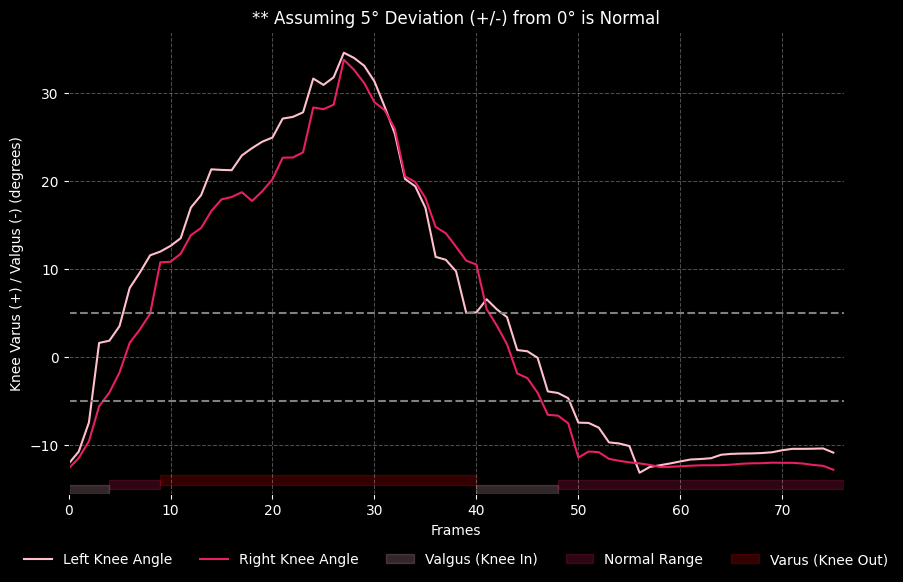

In [18]:

# KNEES in (Valgus) = -
# KNEES out (Varus)= + 

# she goes valgus, normal, varus, normal, valgus



light_pink = '#ffc0cb'
dark_pink = '#e91e63'
degree_symbol = '\u00b0'

plt.figure(figsize=(10, 6), facecolor='black')
plt.style.use('dark_background')
# Plot knee angles with distinct colors
plt.plot(LeftKneeAngle, label='Left Knee Angle', color=light_pink)
plt.plot(RightKneeAngle, label='Right Knee Angle', color=dark_pink)

plt.xlim(0, len(LeftKneeAngle))

plt.axhline(y=-5, color='grey', linestyle='--')
plt.axhline(y=5, color='grey', linestyle='--')

# Add informative title and labels
plt.xlabel('Frames')
plt.ylabel('Knee Varus (+) / Valgus (-) (degrees)')
plt.title('** Assuming 5' + degree_symbol + ' Deviation (+/-) from 0' + degree_symbol + ' is Normal')

# Refine legend
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.7)

ax = plt.gca()
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Add normality range with a lighter color
ax.axvspan(0, 4, color=light_pink, alpha=0.2, ymin=0, ymax=0.02, label='Valgus (Knee In)')
ax.axvspan(4, 9, color=dark_pink, alpha=0.2, ymin=0.01, ymax=0.03, label='Normal Range')
ax.axvspan(9, 40, color='red', alpha=0.2, ymin=0.02, ymax=0.04, label='Varus (Knee Out)')
ax.axvspan(40, 48, color=light_pink, alpha=0.2, ymin=0, ymax=0.02,)
ax.axvspan(48, 76, color=dark_pink, alpha=0.2, ymin=0.01, ymax=0.03,)

handles1, labels1 = ax.get_legend_handles_labels()
legend = ax.legend(handles1, labels1, loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=5)
legend.get_frame().set_edgecolor('black')  # Set the legend box outline color


# Add faint gridlines
plt.grid(True, linestyle='--', linewidth=0.75, color='white', which='both', alpha=0.3)

# Show plot
plt.show()